<a href="https://colab.research.google.com/github/depknaraynscientist/Data_Science/blob/main/ML_Zoomcamp_A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 6.10 Homework

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column `'price'`).

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

Let's load the data:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!wget "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv"

--2021-10-20 12:18:03--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv’

AB_NYC_2019.csv     100%[===================>]   6.75M  --.-KB/s    in 0.09s   

2021-10-20 12:18:04 (74.3 MB/s) - ‘AB_NYC_2019.csv’ saved [7077973/7077973]



In [3]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]
df = pd.read_csv('AB_NYC_2019.csv', usecols=columns) #gets only the required columns.
df.reviews_per_month = df.reviews_per_month.fillna(0)

* Apply the log tranform to `price`
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1

In [4]:
#df['price'].describe()
#df['price'] = np.log(df['price']) #issue in taking log. So lets take log1p
df['price'] = np.log1p(df['price'])

In [5]:
df['price'].describe()

count    48895.000000
mean         4.736885
std          0.695344
min          0.000000
25%          4.248495
50%          4.672829
75%          5.170484
max          9.210440
Name: price, dtype: float64

In [6]:
df['price'].isnull().sum()

0

In [7]:
from IPython.display import display

In [8]:
#A bit of EDA
display(df.info())
print("-------------")
#no missing values cos we filled the 1 column with zeros
#48895 rows
for i in df.columns:
  display(df[i].nunique())
#categorical : neighbourhood_group, room_type
categorical = ['neighbourhood_group', 'room_type']
numerical = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  float64
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 3.7+ MB


None

-------------


5

19048

14718

3

674

109

394

938

47

366

In [9]:
len(numerical) #has all except 2 categorical and 1 o/p variable.


7

In [10]:
for i in categorical:
  print(df[i].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
['Private room' 'Entire home/apt' 'Shared room']


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_1, X_test, y_1, y_test = train_test_split(df[numerical + categorical], df['price'], test_size = 0.2, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_1, y_1, test_size=0.25, random_state=1)

In [13]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(29337, 9) (9779, 9) (9779, 9)
(29337,) (9779,) (9779,)


In [14]:
#Important : we need to reset the indexes else it will throw an error later.
#Lets take a look at the X-train, X_val, etc.
X_train #all are jumbled, so lets reset the indexes.

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,room_type
385,40.76434,-73.92132,4,30,0.32,1,363,Queens,Entire home/apt
33147,40.73442,-73.95854,5,2,0.16,1,0,Brooklyn,Private room
33881,40.66359,-73.99487,1,33,2.75,5,113,Brooklyn,Entire home/apt
37208,40.63766,-74.02626,3,1,0.12,2,362,Brooklyn,Private room
7485,40.65118,-74.00842,2,0,0.00,2,365,Brooklyn,Private room
...,...,...,...,...,...,...,...,...,...
2738,40.69332,-73.96543,12,11,0.15,1,15,Brooklyn,Entire home/apt
25619,40.71856,-73.98753,4,0,0.00,1,0,Manhattan,Private room
40278,40.69034,-73.84611,3,0,0.00,2,178,Queens,Private room
17605,40.76324,-73.98459,10,1,0.03,1,0,Manhattan,Entire home/apt


In [15]:
X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [16]:
#Dont forget to do for y as well.
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [17]:
X_train
X_val
X_test #now indices are not jumbled.

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,room_type
0,40.74596,-73.87762,2,0,0.00,2,66,Queens,Private room
1,40.75883,-73.92160,2,0,0.00,1,282,Queens,Entire home/apt
2,40.69670,-73.97477,1,53,2.15,1,0,Brooklyn,Private room
3,40.72435,-73.95154,1,119,2.57,2,1,Brooklyn,Private room
4,40.72754,-73.98555,3,12,0.19,2,0,Manhattan,Entire home/apt
...,...,...,...,...,...,...,...,...,...
9774,40.85062,-73.90251,14,5,0.13,1,322,Bronx,Private room
9775,40.70450,-73.94357,6,5,2.17,1,40,Brooklyn,Entire home/apt
9776,40.65100,-73.94886,2,263,2.69,2,136,Brooklyn,Private room
9777,40.68040,-73.93183,7,53,1.12,2,77,Brooklyn,Entire home/apt


In [18]:
y_train
y_val
y_test #now indices for response are also not jumbled.

0       4.110874
1       5.525453
2       4.394449
3       4.564348
4       6.111467
          ...   
9774    3.713572
9775    5.017280
9776    3.931826
9777    4.663439
9778    3.931826
Name: price, Length: 9779, dtype: float64

Now, use `DictVectorizer` to turn train and validation into matrices:

In [19]:
from sklearn.feature_extraction import DictVectorizer

In [20]:
dict_train = X_train.to_dict(orient="records")
dv = DictVectorizer(sparse=False)
X_train_encoded = dv.fit_transform(dict_train)

In [21]:
dict_val = X_val.to_dict(orient="records")
X_val_encoded = dv.transform(dict_val)
dict_test = X_test.to_dict(orient="records")
X_test_encoded = dv.transform(dict_test)

In [22]:
#no of cols increases after encoding cos new features get created for categorical column values.
print(X_train_encoded.shape, X_val_encoded.shape, X_test_encoded.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(29337, 15) (9779, 15) (9779, 15)
(29337,) (9779,) (9779,)


In [23]:
X_train_encoded

array([[363.     ,   1.     ,  40.76434, ...,   1.     ,   0.     ,
          0.     ],
       [  0.     ,   1.     ,  40.73442, ...,   0.     ,   1.     ,
          0.     ],
       [113.     ,   5.     ,  40.66359, ...,   1.     ,   0.     ,
          0.     ],
       ...,
       [178.     ,   2.     ,  40.69034, ...,   0.     ,   1.     ,
          0.     ],
       [  0.     ,   1.     ,  40.76324, ...,   1.     ,   0.     ,
          0.     ],
       [362.     ,  23.     ,  40.74563, ...,   1.     ,   0.     ,
          0.     ]])

## Question 1

Let's train a decision tree regressor to predict the price variable. 

* Train a model with `max_depth=1`

In [24]:
from sklearn.tree import DecisionTreeRegressor
model_qn1 = DecisionTreeRegressor(max_depth=1)


In [25]:
model_qn1.fit(X_train_encoded, y_train)
# model_qn1.predict_proba(X_val)[:,1]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [26]:
from sklearn.tree import export_text


In [27]:
dv.get_feature_names()

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

In [28]:
print(export_text(model_qn1, feature_names=dv.get_feature_names()))

#feature_12 is what we need : room_type

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [4.29]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [5.15]



In [29]:
X_train.head(3)

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,room_type
0,40.76434,-73.92132,4,30,0.32,1,363,Queens,Entire home/apt
1,40.73442,-73.95854,5,2,0.16,1,0,Brooklyn,Private room
2,40.66359,-73.99487,1,33,2.75,5,113,Brooklyn,Entire home/apt


In [30]:
X_train_encoded[0:4,:] #dv causes loss of column order

array([[ 3.630000e+02,  1.000000e+00,  4.076434e+01, -7.392132e+01,
         4.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         1.000000e+00,  0.000000e+00,  3.000000e+01,  3.200000e-01,
         1.000000e+00,  0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  1.000000e+00,  4.073442e+01, -7.395854e+01,
         5.000000e+00,  0.000000e+00,  1.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  2.000000e+00,  1.600000e-01,
         0.000000e+00,  1.000000e+00,  0.000000e+00],
       [ 1.130000e+02,  5.000000e+00,  4.066359e+01, -7.399487e+01,
         1.000000e+00,  0.000000e+00,  1.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  3.300000e+01,  2.750000e+00,
         1.000000e+00,  0.000000e+00,  0.000000e+00],
       [ 3.620000e+02,  2.000000e+00,  4.063766e+01, -7.402626e+01,
         3.000000e+00,  0.000000e+00,  1.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  1.000000e+00,  1.200000e-01,
         0.000000e+00,

Which feature is used for splitting the data?

* `room_type`
* `neighbourhood_group`
* `number_of_reviews`
* `reviews_per_month`

In [31]:
#answered above

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
model_qn_2 = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1) #n_estimators is the no of trees. #n_jobs will parallelize i think
model_qn_2.fit(X_train_encoded, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [38]:
from sklearn.metrics import mean_squared_error

In [45]:
X_val_encoded.shape


(9779, 15)

In [51]:
y_predict_qn2 = model_qn_2.predict(X_val_encoded)
#y_predict_qn2
display(mean_squared_error(y_val, y_predict_qn2, squared=False)) #without taking np.expm1
display(np.expm1(mean_squared_error(y_val, y_predict_qn2, squared=False))) #after taking np.expm1

0.460888788095762

0.5854825169456447

What's the RMSE of this model on validation?

* 0.059
* 0.259
* 0.459
* 0.659

In [ ]:
#answered above

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10
* Set `random_state` to `1`
* Evaluate the model on the validation dataset

In [54]:
def pred_rf_wrt_estimators(n):
  model = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
  model.fit(X_train_encoded, y_train)
  prediction = model.predict(X_val_encoded)
  rmse = mean_squared_error(y_val, prediction, squared=False)
  return rmse

In [55]:
estimator_list = np.arange(10,210, 10)
result = []
for numbr in estimator_list:
  result.append(pred_rf_wrt_estimators(numbr))

In [56]:
import matplotlib.pyplot as plt

In [57]:
result

[0.460888788095762,
 0.4474405542590174,
 0.44440015830200136,
 0.44281711871165336,
 0.44176815762157207,
 0.44125165338475053,
 0.44064455072014125,
 0.440740830263047,
 0.4402749020311618,
 0.4397631903425602,
 0.4393128261208466,
 0.43912990819267467,
 0.43927965755127013,
 0.4391514983746916,
 0.43902892484355854,
 0.4388423640549406,
 0.43874605090230334,
 0.4388528948224223,
 0.43879074353852315,
 0.4387871286025359]

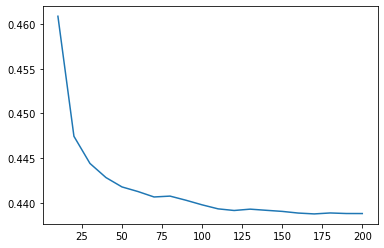

In [58]:
plt.plot(estimator_list, result)
plt.show()

After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 120

In [ ]:
#around 120.

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`

In [59]:
def pred_rf_wrt_estimators_And_Depth(n, d):
  model = RandomForestRegressor(n_estimators=n, max_depth = d, random_state=1, n_jobs=-1)
  model.fit(X_train_encoded, y_train)
  prediction = model.predict(X_val_encoded)
  rmse = mean_squared_error(y_val, prediction, squared=False)
  return rmse

In [60]:
estimator_list = np.arange(10,210, 10)
for depth in [10,15,20,25]:
  result_numbr_depth = []
  for numbr in estimator_list:
    print("numbr, depth : ", numbr, depth)
    result_numbr_depth.append(pred_rf_wrt_estimators_And_Depth(numbr, depth))

numbr, depth :  10 10
numbr, depth :  20 10
numbr, depth :  30 10
numbr, depth :  40 10
numbr, depth :  50 10
numbr, depth :  60 10
numbr, depth :  70 10
numbr, depth :  80 10
numbr, depth :  90 10
numbr, depth :  100 10
numbr, depth :  110 10
numbr, depth :  120 10
numbr, depth :  130 10
numbr, depth :  140 10
numbr, depth :  150 10
numbr, depth :  160 10
numbr, depth :  170 10
numbr, depth :  180 10
numbr, depth :  190 10
numbr, depth :  200 10
numbr, depth :  10 15
numbr, depth :  20 15
numbr, depth :  30 15
numbr, depth :  40 15
numbr, depth :  50 15
numbr, depth :  60 15
numbr, depth :  70 15
numbr, depth :  80 15
numbr, depth :  90 15
numbr, depth :  100 15
numbr, depth :  110 15
numbr, depth :  120 15
numbr, depth :  130 15
numbr, depth :  140 15
numbr, depth :  150 15
numbr, depth :  160 15
numbr, depth :  170 15
numbr, depth :  180 15
numbr, depth :  190 15
numbr, depth :  200 15
numbr, depth :  10 20
numbr, depth :  20 20
numbr, depth :  30 20
numbr, depth :  40 20
numbr, dep

What's the best `max_depth`:

* 10
* 15
* 20
* 25

Bonus question (not graded):

Will the answer be different if we change the seed for the model?

In [75]:
df = pd.DataFrame(data=None, columns=["number", "depth"])
i=0
dict = {
    [10,15,20,25]:estimator_list
}
display(dict)


TypeError: ignored

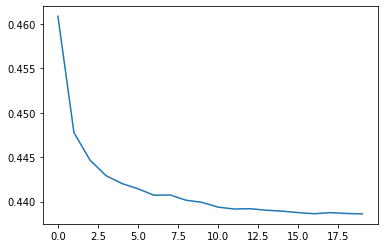

In [63]:
plt.plot(result_numbr_depth)
pd.DataFrame(estimator_list, [10,15,20,25])
plt.show()

Answer :Yes i believe answer will change bcos the randomizations during bootstrapping change, and scikitlearn uses bootstrap=True for RandomForestRegressor by default.

## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the `feature_importances_` field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model

In [76]:
#Getting feature importance.
model_qn5 = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
model_qn5.fit(X_train_encoded, y_train)
importances = model_qn5.feature_importances_

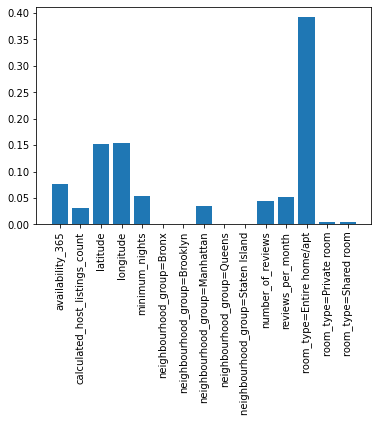

In [81]:
plt.bar(dv.get_feature_names(), importances )
plt.xticks(rotation = 90)
plt.show()

What's the most important feature? 

* `neighbourhood_group=Manhattan`
* `room_type=Entire home/apt`	
* `longitude`
* `latitude`

Answer : room_type=Entire home/apt

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` first to `0.1` and then to `0.01`

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* 0.01

## Submit the results


Submit your results here: https://forms.gle/wQgFkYE6CtdDed4w8

It's possible that your answers won't match exactly. If it's the case, select the closest one.


## Deadline


The deadline for submitting is 20 October 2021, 17:00 CET (Wednesday). After that, the form will be closed.

